# Time Series Data Exploration & Visualization Assignment

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Read the sales.csv data set into a Pandas dataframe.

In [8]:
sales_df = pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Time%20Series%20Analysis/Time%20Series%20-%20Day%202/sales.csv", sep=";")

In [10]:
sales_df.head()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber
0,1,6,27039,381,7,NaN,"0,00",2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G
1,2,16,25011,61,7,NaN,"0,00",2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8
2,3,13,94024,23,24,NaN,"0,00",2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0
3,4,8,73966,176,19,0.2,"0,00",2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE
4,5,10,32653,310,9,NaN,"0,00",2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3


### Convert the SalesDate field to a datetime data type.

In [11]:
sales_df.SalesDate = pd.to_datetime(sales_df.SalesDate)
sales_df.head()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber
0,1,6,27039,381,7,NaN,"0,00",2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G
1,2,16,25011,61,7,NaN,"0,00",2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8
2,3,13,94024,23,24,NaN,"0,00",2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0
3,4,8,73966,176,19,0.2,"0,00",2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE
4,5,10,32653,310,9,NaN,"0,00",2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3


### Create a line chart showing the number of total units sold per day in February.

In [12]:
sales_df['Date'] = sales_df['SalesDate'].dt.date
sales_df['Month'] = sales_df['SalesDate'].dt.strftime('%B')
sales_df['Day'] = sales_df['SalesDate'].dt.day
sales_df['Hour'] = sales_df['SalesDate'].dt.hour
sales_df['Minute'] = sales_df['SalesDate'].dt.minute

In [16]:
sales_df.head()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber,Date,Month,Day,Hour,Minute
0,1,6,27039,381,7,NaN,"0,00",2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G,2018-02-05,February,5.0,7.0,38.0
1,2,16,25011,61,7,NaN,"0,00",2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8,2018-02-02,February,2.0,16.0,3.0
2,3,13,94024,23,24,NaN,"0,00",2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0,2018-05-03,May,3.0,19.0,31.0
3,4,8,73966,176,19,0.2,"0,00",2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE,2018-04-07,April,7.0,14.0,43.0
4,5,10,32653,310,9,NaN,"0,00",2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3,2018-02-12,February,12.0,15.0,37.0


Text(0.5, 1.0, 'Number of Units Sold Per Day in February')

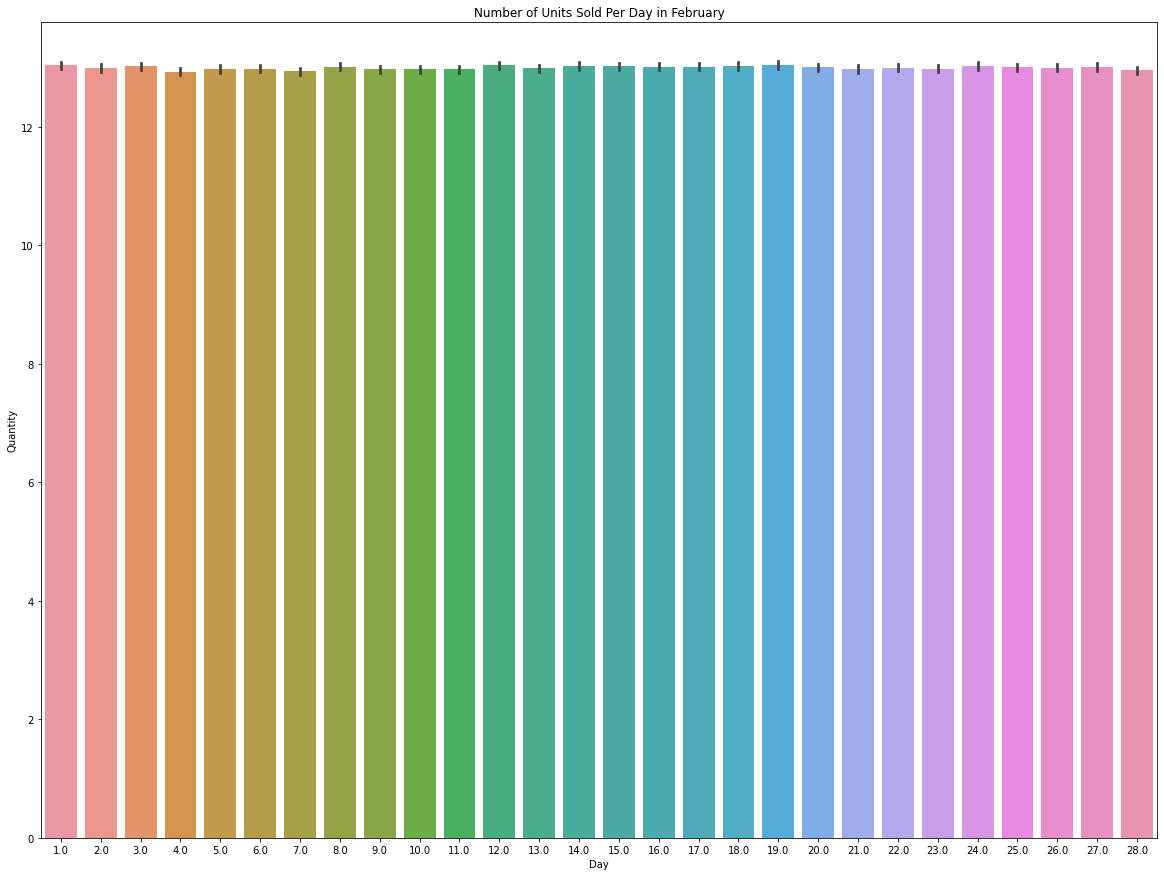

In [20]:
feb = sales_df[sales_df.Month == 'February']
plt.figure(figsize=(20,15))
sns.barplot(data=feb, x="Day", y="Quantity")
plt.title("Number of Units Sold Per Day in February")

### Create a multi-line chart comparing the daily units sold in March for the following product IDs: 124, 344, 407, and 449.

In [26]:
multi_line = sales_df[
                      (sales_df.Month == 'March') &
                      ((sales_df.ProductID == 124) |
                      (sales_df.ProductID == 344) |
                      (sales_df.ProductID == 407) |
                      (sales_df.ProductID == 449))
                      ]

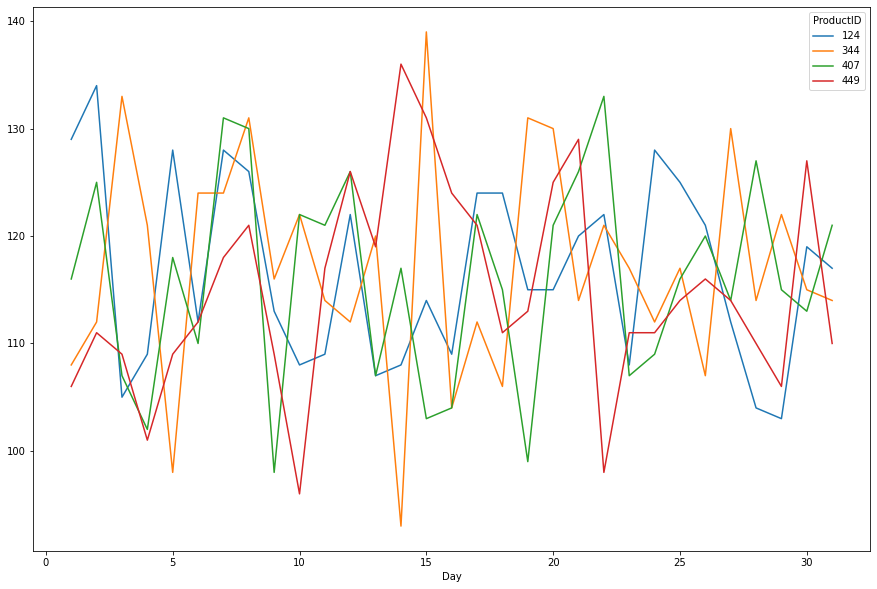

In [32]:
multi_march = multi_line.pivot_table(
    index="Day",
    columns="ProductID",
    values="Quantity",
    aggfunc="count"
)

multi_march.plot(kind="line", figsize=(15,10))
plt.show()

### Create a bar chart that shows units sold by each hour of the day.

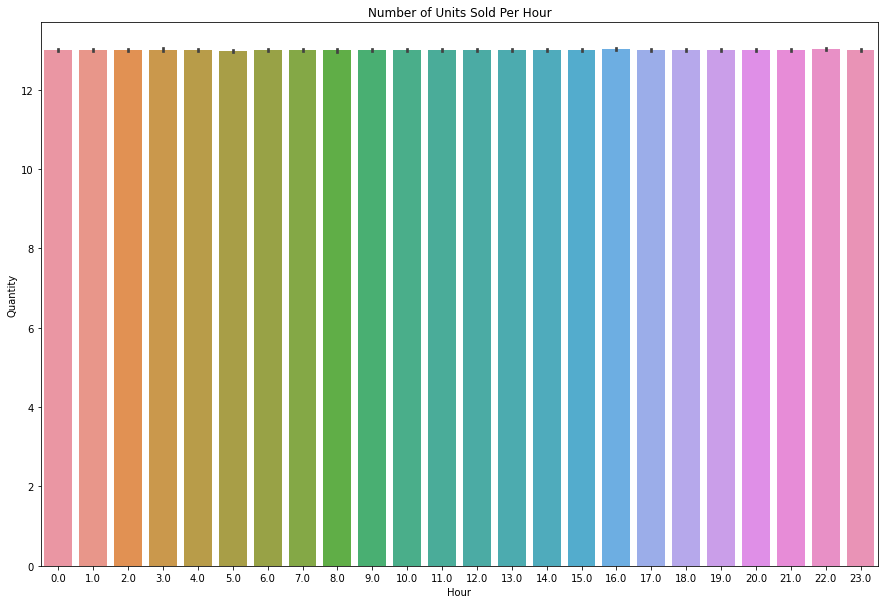

In [34]:
plt.figure(figsize=(15,10))
sns.barplot(data=sales_df, x="Hour", y="Quantity")
plt.title("Number of Units Sold Per Hour")
plt.show()

### Create a heatmap that shows total unit sales by hour of the day and day of the week.

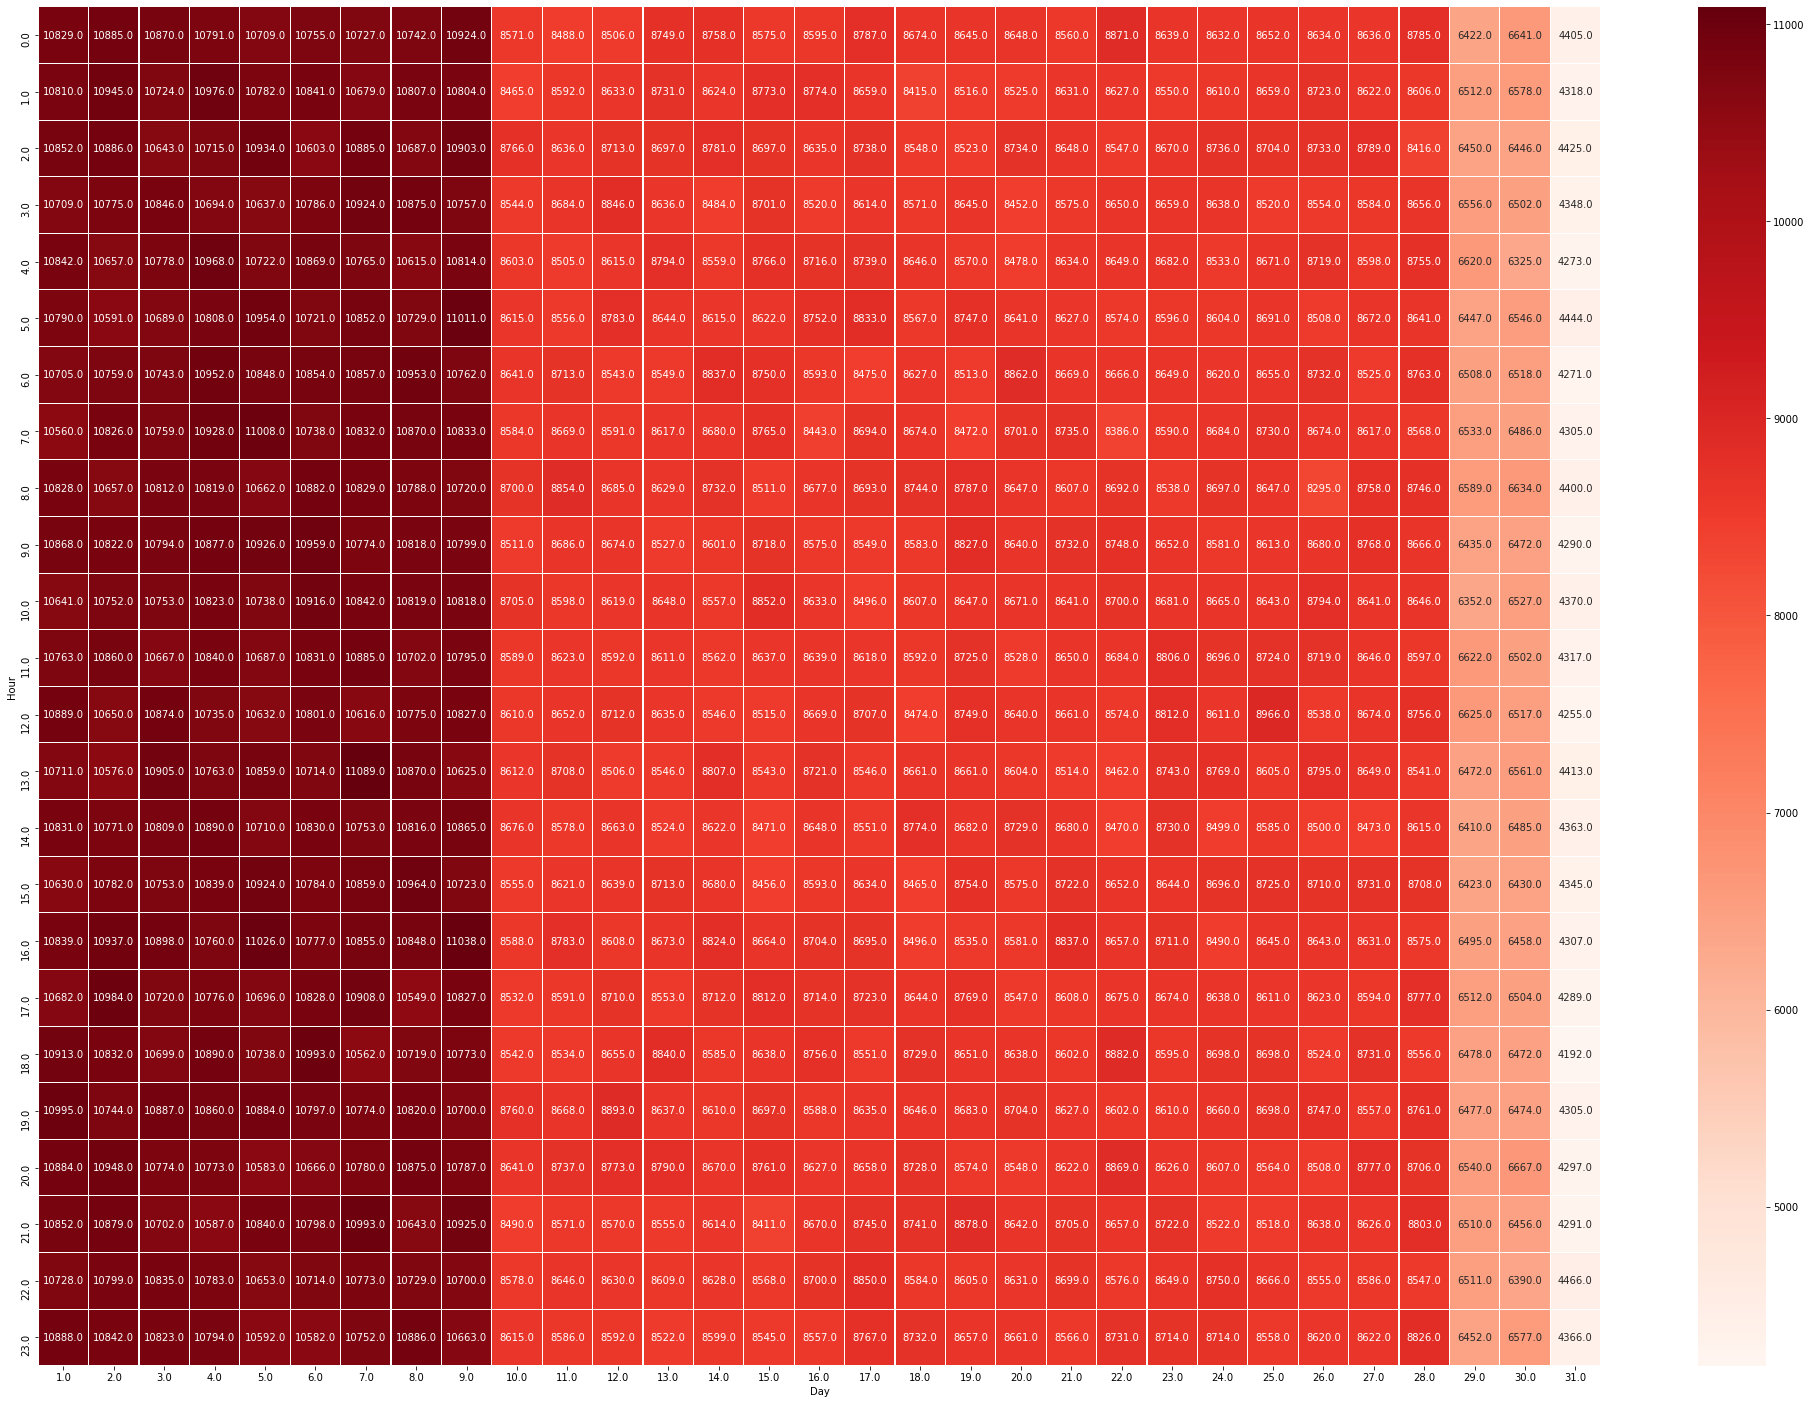

In [39]:
heatmap_df = sales_df.pivot_table(index="Hour", columns="Day", values="Quantity", aggfunc="count")

plt.figure(figsize=(35,25))
sns.heatmap(data=heatmap_df, annot=True, fmt=".1f", cmap="Reds", linewidths=.01)
plt.show()

### Choose 20 ProductIDs at random and create a correlation plot showing the correlation of daily units sold for them 

In [46]:
from random import sample

In [49]:
pids = list(sales_df.ProductID.unique())
rand_pids = sample(pids,20)
rand_pids

[403,
 421,
 303,
 305,
 82,
 379,
 409,
 345,
 205,
 198,
 274,
 334,
 154,
 216,
 244,
 201,
 302,
 78,
 404,
 151]

In [53]:
rand_df = sales_df[sales_df.ProductID.isin(rand_pids)]

In [55]:
rand_df.head()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber,Date,Month,Day,Hour,Minute
57,58,14,27995,151,8,NaN,"0,00",2018-04-26 10:40:18.780,RXO4KNT6XHEFIULKLKO1,2018-04-26,April,26.0,10.0,40.0
96,97,21,1358,78,1,0.1,"0,00",2018-01-30 12:35:48.080,8DOKJUM3MQKFMAGSJ3SL,2018-01-30,January,30.0,12.0,35.0
128,129,21,71159,198,19,NaN,"0,00",2018-01-21 20:16:41.590,UN6B6EWZIX8Y0J8K9YWI,2018-01-21,January,21.0,20.0,16.0
161,162,2,90694,302,23,0.1,"0,00",2018-03-30 20:00:30.110,Z0OSXW58SXWAVPIX9OPZ,2018-03-30,March,30.0,20.0,0.0
235,236,16,1587,244,1,NaN,"0,00",2018-01-26 23:09:48.330,SZ7NQ1LXSZL5CJXVW4XD,2018-01-26,January,26.0,23.0,9.0


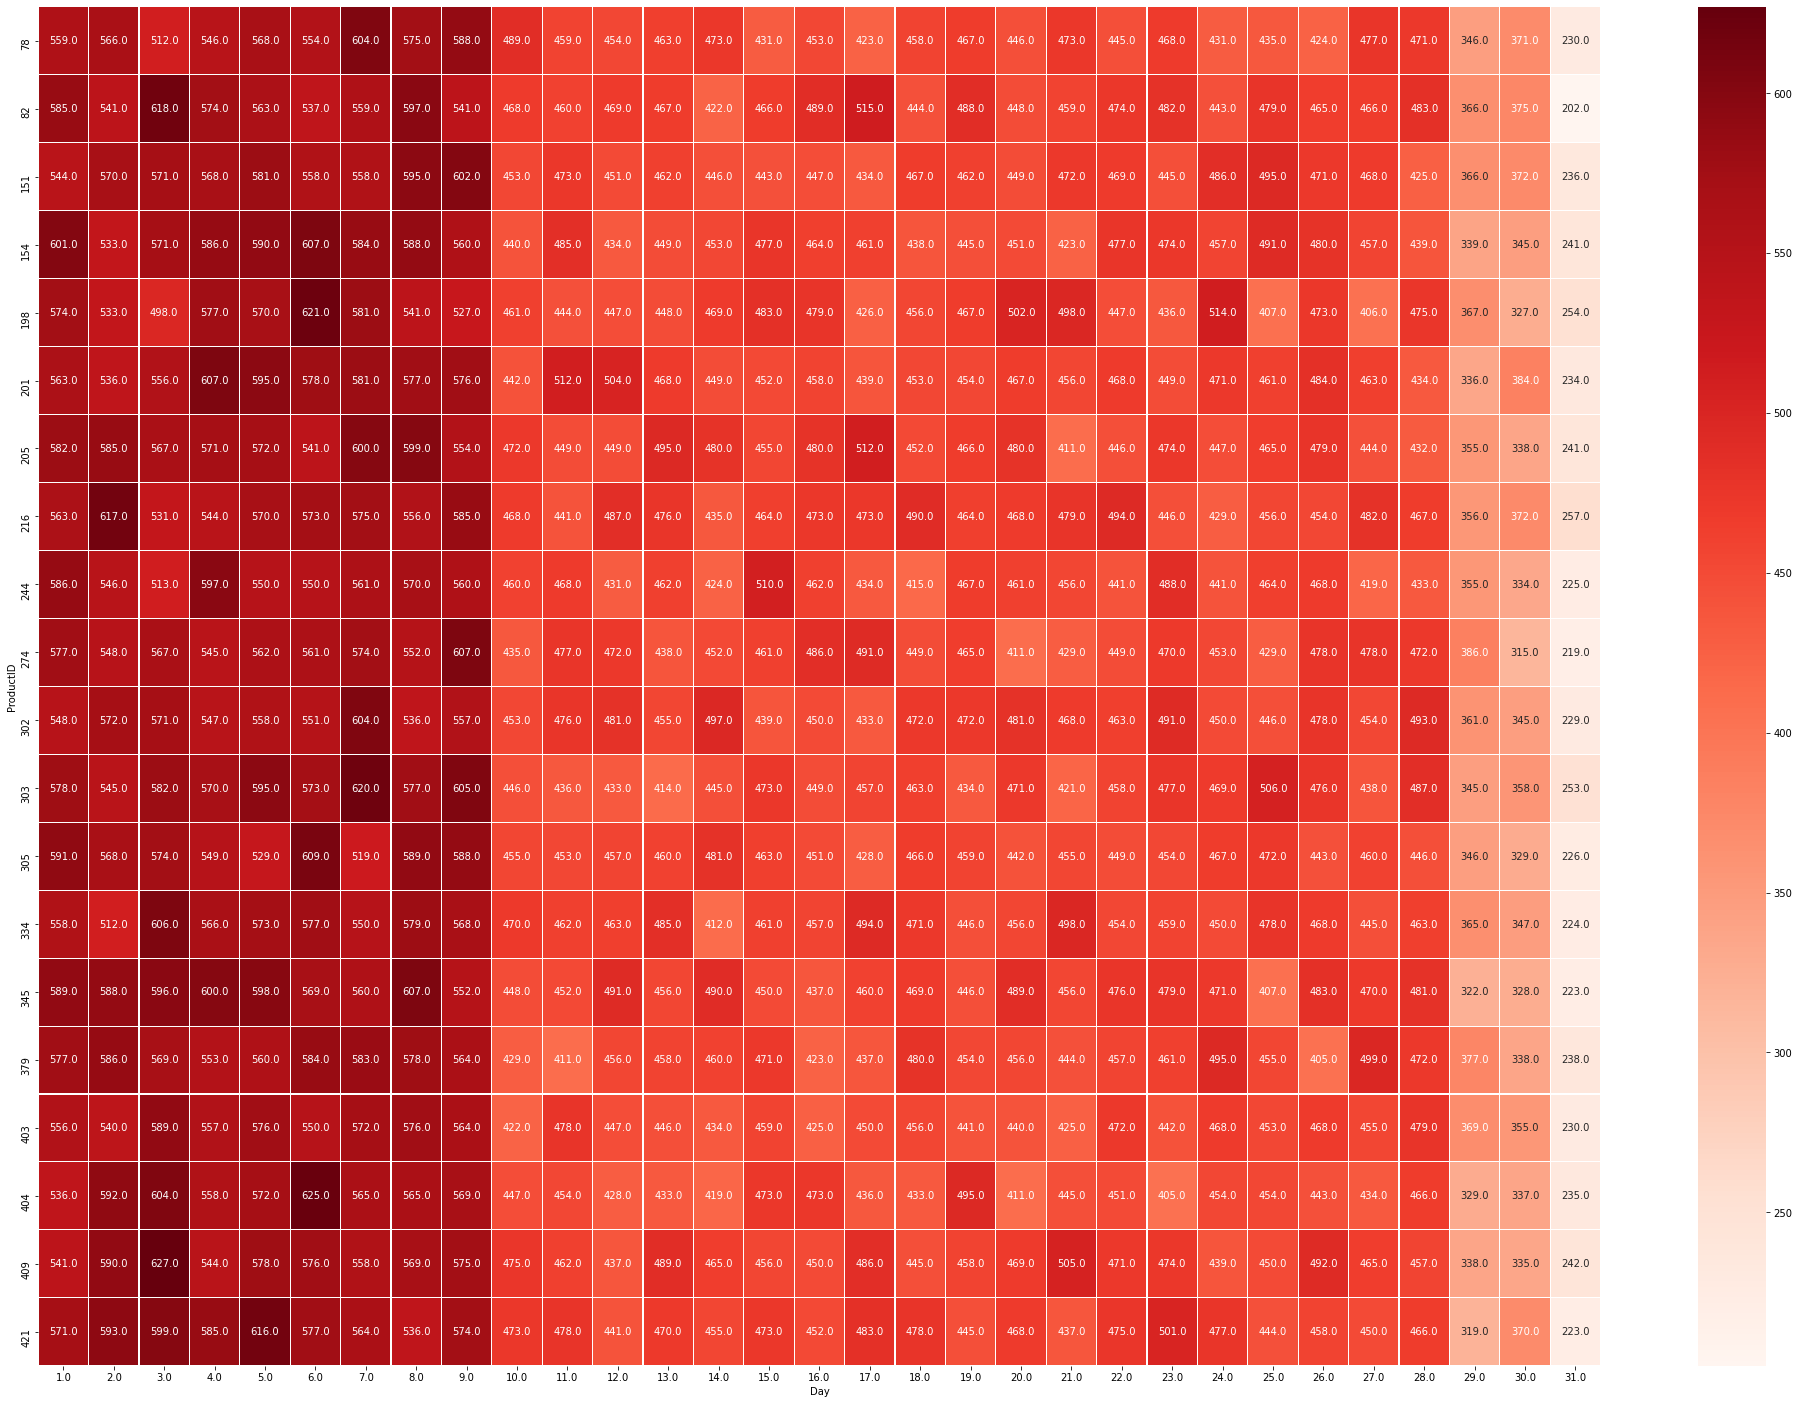

In [57]:
pid_heatmap = rand_df.pivot_table(index="ProductID", columns="Day", values="Quantity", aggfunc="count")

plt.figure(figsize=(35,25))
sns.heatmap(data=pid_heatmap, annot=True, fmt=".1f", cmap="Reds", linewidths=.01)
plt.show()

### Create a histogram showing the distribution of daily units sold.

In [62]:
dist_df = sales_df.pivot_table(index="Day", columns="ProductID", values="Quantity", aggfunc="count")

In [63]:
dist_df.head()

ProductID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452
Day,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,600,571,586,562,573,571,592,566,539,558,536,607,541,538,593,597,598,626,577,587,574,611,587,579,584,587,582,625,554,578,569,579,587,533,601,559,517,570,578,569,...,557,583,610,582,582,544,560,592,571,590,596,604,572,605,617,576,586,558,550,553,586,586,567,545,599,594,629,544,567,552,586,561,563,545,560,555,576,559,579,535
2.0,581,562,579,557,605,591,507,544,544,580,564,585,549,631,564,601,565,618,526,598,567,567,583,586,549,582,591,583,565,592,613,594,588,596,573,554,588,543,577,554,...,570,593,587,572,552,548,595,567,593,568,576,601,570,506,549,539,556,587,533,550,608,585,586,601,578,572,630,543,593,556,571,568,623,608,550,580,526,541,596,591
3.0,550,513,590,584,596,592,591,586,559,589,554,595,548,584,592,561,540,545,569,591,586,624,547,574,598,538,583,602,607,619,596,570,536,536,590,566,590,577,606,557,...,593,577,532,547,581,588,604,602,599,589,567,572,611,561,594,603,596,594,569,602,548,564,550,609,546,567,570,613,557,603,595,556,553,555,580,578,577,564,525,572
4.0,600,555,596,584,614,545,573,629,553,609,553,531,573,568,592,619,573,575,578,595,576,591,601,585,542,547,571,550,562,544,559,572,535,575,558,614,568,586,594,570,...,617,558,599,585,608,528,579,561,585,568,556,606,585,586,564,552,556,522,612,532,550,598,553,583,600,584,604,568,558,589,568,559,582,572,564,575,558,543,554,599
5.0,546,605,547,555,578,571,588,592,543,570,569,607,577,597,581,538,588,565,567,619,543,578,523,525,560,536,544,579,602,541,551,558,545,559,578,534,587,572,589,558,...,582,547,547,600,568,602,561,584,616,628,580,608,592,594,580,548,610,588,583,541,551,563,580,583,576,550,549,577,557,555,551,564,566,553,608,556,562,621,599,619


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Daily Sales Distribution')

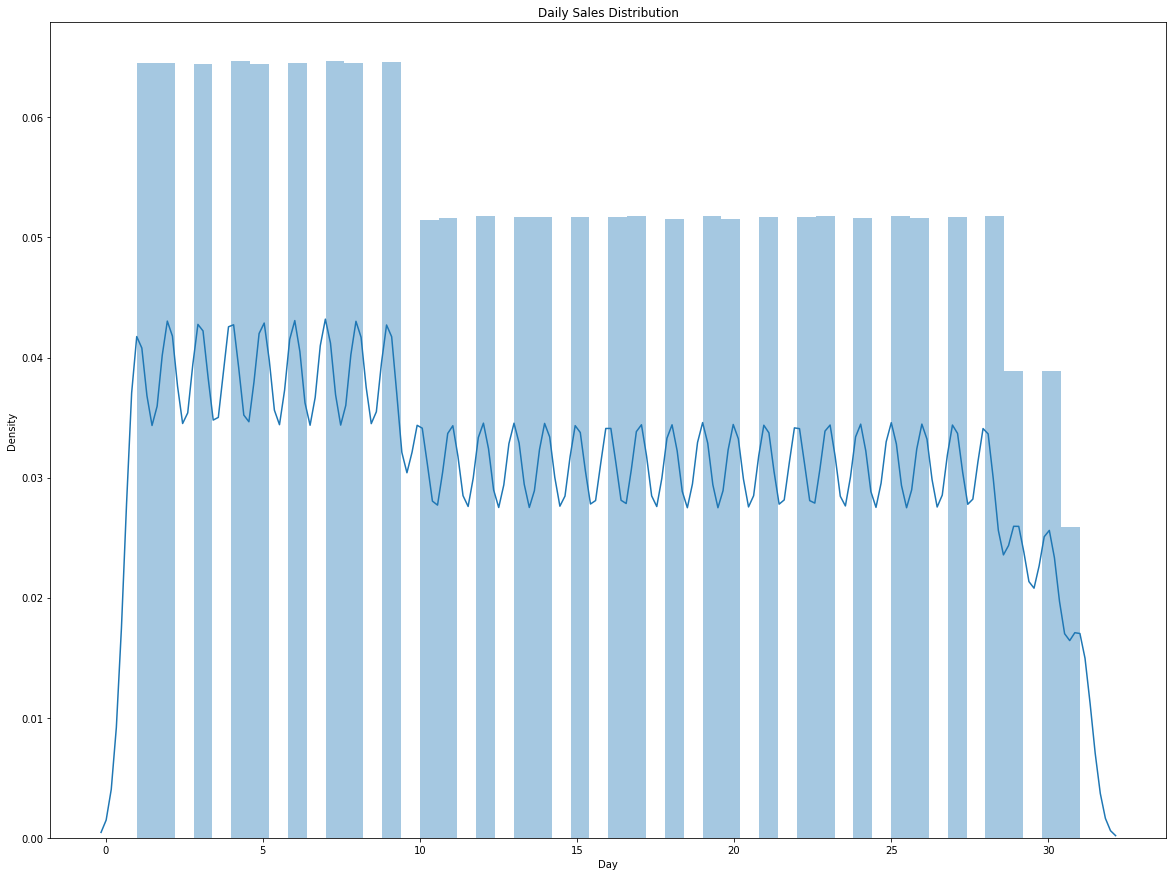

In [69]:
plt.figure(figsize=(20,15))
sns.distplot(sales_df["Day"])
plt.title("Daily Sales Distribution")
plt.show()

### Create a violin plot showing the distribution of daily units sold by month.

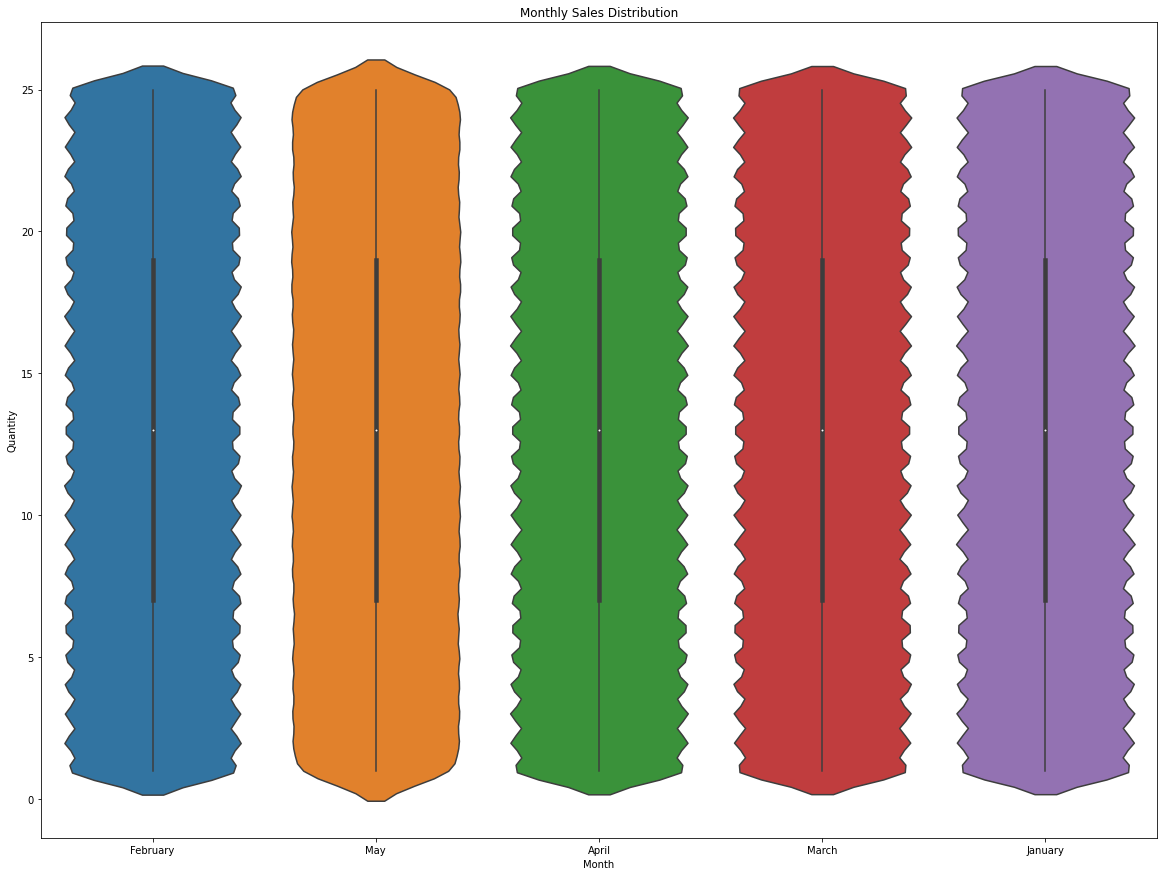

In [71]:
plt.figure(figsize=(20,15))
sns.violinplot(x="Month", y="Quantity", data=sales_df)
plt.title("Monthly Sales Distribution")
plt.show()